#### The puprpose of this notebook is to calculate original SAIN LIM and weighted (modified) nutrition score for all food items (59K) and compare them

##### Author: Reshma

#### SAIN Score
The SAIN score was an unweighted arithmetic mean of the percentage adequacy for 5 positive nutrients (plus 1 optional
nutrient - vitamin D). It was calculated for 100 kcal of food.

#### LIM Score
The LIM score was the mean percentage of the maximal recommended values for 3 nutrients, the intakes of which should be limited in a healthy diet. The LIM score was calculated for 100 g of food.

#### Weighted SAIN Score
The SAIN score was an unweighted arithmetic mean of the percentage adequacy for 24 positive nutrients. It was calculated for 100 kcal of food.

#### Weighted LIM Score
The LIM score was the mean percentage of the maximal recommended values for 4 nutrients, the intakes of which should be limited in a healthy diet. The LIM score was calculated for 100 g of food.

#### SAIN Score Formula
The nutrients included in the SAIN were proteins, fiber, ascorbic acid, calcium, and iron.
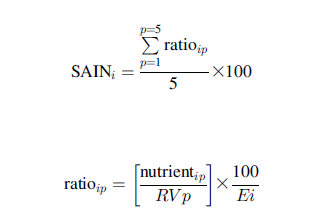

#### LIM Score Formula
The 3 limited nutrients were sodium, added sugars, and saturated fatty acids (SFAs). The LIM was multiplied by 2.5 for soft drinks.
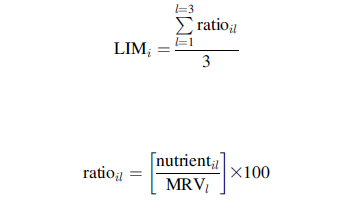

#### Tables to consider while calculations
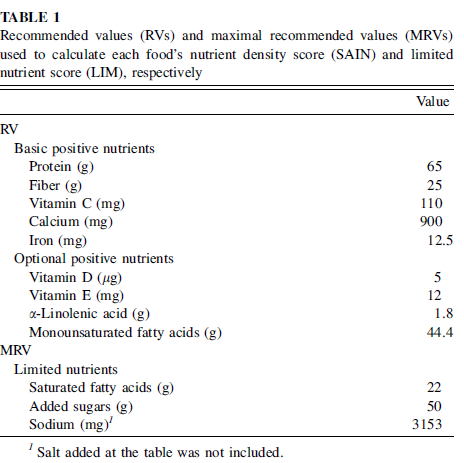

### Add micronutrients to each class
Nutritional constraints included in the ‘‘healthy’’ and ‘‘unhealthy’’ linear programming models.
In the ‘‘healthy’’ models, the nutritional quality of the modeled diets was achieved by a set of 40 constraints on macro- and
micronutrients based on European recommendations (30) and on mean French recommendations for men and women (29). For positive nutrients, minimal constraints were set at the level of the Recommended Dietary Allowances. Maximal constraints were included when needed, based on known safety levels of intakes for some nutrients. Constraints on nutrients whose intakes should be limited in a healthy diet (ie, total lipids, SFAs, total sugars, added sugars, sodium, and cholesterol) were also included to ensure that the modeled ‘‘healthy’’ diets will not exceed the maximal limits recommended for these nutrients. In contrast, in the ‘‘unhealthy’’ models, the nutritional constraints were introduced to ensure that the modeled diets had a low content of essential nutrients and a high content of total lipids, SFAs, total sugars, added sugars, sodium, and cholesterol. Unbalanced modeled diets were obtained by inverting the sign of the constraints in the unhealthy compared with the healthy models, and, for fiber, essential fatty acids, and micronutrients by setting the maximum at 77% of the Recommended Dietary Allowance (ie, approximately the level of the Estimated Average Requirements). In both healthy and unhealthy models,the realism and social acceptability of the modeled diets wereachieved by the same set of constraints on food and food group’s weights (in g) to ensure that the inclusion of any one food and food group could not exceed the 99th percentile limit of the corresponding consumer intake distribution. The effect of selecting foods according to their SAIN,LIM profiles on the possibility to fulfill the nutrient constraints introduced in the healthy and unhealthy models was tested by designing models that differed by the list of foods allowed to be included in the modeled diets. Depending on the model, the food access was restricted to one SAIN,LIM class only or to one of all the possible combinations of the 4 classes, leading to a total of 15 models (4 single models 1 11 combination models) for each set of nutritional constraints, ie, 15 healthy models and 15 unhealthy models. Each
model was named by the type of SAIN,LIM class allowed for the food variables. Unfeasible models were first identified. Then, for each feasible model, 2 objective functions were run—energy minimization and maximization—to assess the minimal energy
needed to fulfill the constraints and the maximal energy achievable while fulfilling them, respectively. These theoretical energy bounds were compared with the mean observed energy intake in the general population (ie, 2000 kcal, or 8.3 MJ/d). In addition, the energy contributed by each SAIN,LIM class in each feasible combination model was assessed.

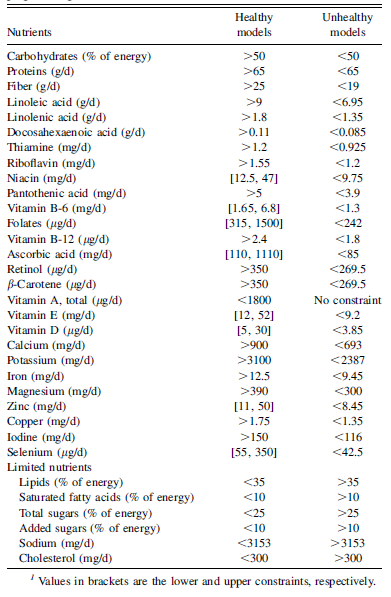

In [1]:
#max, min range
thiamine         = [1.2, 0.925] 
riboflavin       = [1.55, 1.2]
pantothenic_acid = [0.5, 3.9]
retinol          = [0.35, 269.5]
beta_carotene    = [0.35, 269.5]
vit_b12          = [2.4, 1.8]
calcium          = [900, 693]
potassium        = [3100, 2387]
iron             = [12.5, 9.45]
mgnesium         = [390, 300]
copper           = [1.75, 1.35]
cholesterol      = [300, 300]
vit_a            = [1800] #mcg
vit_a            = [5000] #IU - FDA reference

#middle, max, min range
niacin           = [12.5, 47, 9.75] 
vit_b6           = [1.65, 6.8, 1.3]
folates          = [315, 1500, 242]
asc_acid         = [110, 1110, 85]
vit_e            = [12, 52, 9.2]
vit_d            = [5, 30, 3.85]
zinc             = [11, 50, 8.45]
selenium         = [55, 350, 42.5]

In [12]:
#import libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from wordcloud import WordCloud ,STOPWORDS
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from nutri_utils import *
# warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [13]:
rv_dict={'Protein': 65, 'Fiber': 25, 'Vitamin C': 110, 'Calcium': 900, 'Iron': 12.5, 'Vitamin D': 5, 'Vitamin E': 12, 
        'Alpha linolenic acid': 1.8, 'Monounsaturated fatty acids': 44.4, 'Saturated fatty acids':22,'Sugars':50, 'Sodium':3153, 
        'Thiamine': 1.2, 'Riboflavin':1.55, 'Pantothenic acid': 0.5, 'Retinol':0.35, 'Beta Carotene': 0.35, 'Vitamin B12': 2.4,
        'Calcium': 900, 'Potassium': 3100, 'Iron': 12.5, 'Magnesium': 390, 'Copper': 1.75, 'Cholesterol': 300, 'Niacin':12.5, 
        'Vitamin B6': 1.65, 'Folates': 315, 'Zinc': 11, 'Selenium': 55, 'Vitamin A': 5000, 'Carbohydrates': 50}

### Reading food items from datasets

In [14]:
path     = 'C:/Users/SSK/DocumentsCourses/Capstone/Datasets/Nutrition/'
fileName = 'Nutrition Data Consolidated (James)_type_EWG.csv' #latest file

In [15]:
data      = pd.read_csv(path+fileName)

In [16]:
drop_cols=['Sub_food_category', 'Main_food_category', 'PRAL score', 'Serving Weight 1 (g)','Serving Description 1 (g)','Serving Weight 2 (g)',
           'Serving Description 2 (g)','Serving Weight 3 (g)','Serving Description 3 (g)','Serving Weight 4 (g)','Serving Description 4 (g)',
           'Serving Weight 5 (g)', 'Serving Description 5 (g)','Serving Weight 6 (g)','Serving Description 6 (g)','Serving Weight 7 (g)',
           'Serving Description 7 (g)','Serving Weight 8 (g)','Serving Description 8 (g)','nf_ingredient_statement','nf_servings_per_container',
           'nf_serving_size_qty','nf_serving_size_unit','usda_field', 'organic','pasteurized','artificial','x_free','reduced_x','low_x']
# data.drop(drop_cols, axis=1, inplace=True)

### Compute Original SAIN Score

In [17]:
sain_cols = ['Protein (g)','Fiber (g)', 'Vitamin C (mg)','Calcium (mg)', 'Iron, Fe (mg)', 'calories', 'Vitamin D (mcg)']

data['SAIN score']            = data[sain_cols].apply(lambda x : compute_sain(x, rv_dict), axis=1)
data['SAIN log score']        = np.log(data['SAIN score'])
data['SAIN log score'].replace([np.inf, -np.inf], 0, inplace=True)

data['SAIN log score'] = data['SAIN log score'].apply(lambda x: 0 if x<0 else x)

### Compute Original  LIM score

In [19]:
lim_cols = ['Sugars (g)', 'Sodium (mg)', 'Saturated Fats (g)', 'aisle']

data['LIM score']     = data[lim_cols].apply(lambda x : compute_lim(x, rv_dict), axis=1)
data['LIM log score'] = np.log(data['LIM score'])
data['LIM log score'].replace([np.inf, -np.inf], 0, inplace=True)

data['LIM log score'] = data['LIM log score'].apply(lambda x: 0 if x<0 else x)

### Compute  Modified SAIN Score

In [20]:
data['Carbohydrates percent energy'] = data[['Carbohydrate (g)', 'calories']].apply(lambda x : (x['Carbohydrate (g)']*100)/x['calories'], axis=1)

In [21]:
sain_weighted_cols = ['Protein (g)','Fiber (g)', 'Vitamin C (mg)','Calcium (mg)', 'Iron, Fe (mg)', 'calories', 'Fatty acids, total monounsaturated (mg)', 'Vitamin D (mcg)', 'Vitamin E (Alpha-Tocopherol) (mg)',
            'Thiamin (B1) (mg)','Riboflavin (B2) (mg)','Niacin (B3) (mg)','Pantothenic acid (B5) (mg)','Vitamin B6 (mg)','Folate (B9) (mcg)','Retinol (mcg)', 'Carotene, beta (mcg)','Potassium, K (mg)','Magnesium (mg)',
            'Copper, Cu (mg)','Zinc, Zn (mg)', 'Selenium, Se (mcg)', 'Vitamin B-12 (mcg)', 'Carbohydrates percent energy','Vitamin A, IU (IU)']

data['SAIN Weighted score']            = data[sain_weighted_cols].apply(lambda x : compute_weighted_sain(x, rv_dict), axis=1)
data['SAIN Weighted log score']        = np.log(data['SAIN Weighted score'])
data['SAIN Weighted log score'].replace([np.inf, -np.inf], 0, inplace=True)

data['SAIN Weighted log score'] = data['SAIN Weighted log score'].apply(lambda x: 0 if x<0 else x)

### Compute Modified LIM Score

In [22]:
lim_weighted_cols = ['Sugars (g)', 'Sodium (mg)', 'Saturated Fats (g)', 'aisle', 'Cholesterol (mg)']

data['LIM Weighted score']     = data[lim_weighted_cols].apply(lambda x : compute_weighted_lim(x, rv_dict), axis=1)
data['LIM Weighted log score'] = np.log(data['LIM Weighted score'])
data['LIM Weighted log score'].replace([np.inf, -np.inf], 0, inplace=True)

data['LIM Weighted log score'] = data['LIM Weighted log score'].apply(lambda x: 0 if x<0 else x)

### Plot Original and Modified log SAIN and LIM score

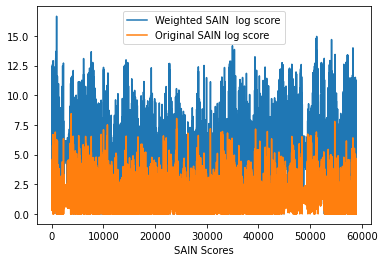

In [35]:
import matplotlib.pyplot as plt
plt.plot(data['SAIN Weighted log score'].values, label = "Weighted SAIN  log score")
plt.plot(data['SAIN log score'].values, label = "Original SAIN log score")

plt.xlabel('SAIN Scores')
plt.legend()
plt.show()

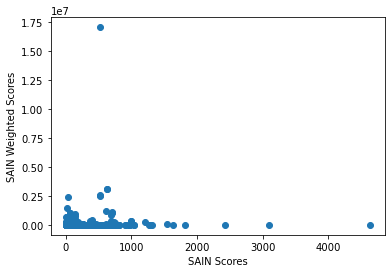

In [48]:
import matplotlib.pyplot as plt
plt.scatter(data['SAIN score'].values, data['SAIN Weighted score'].values)
plt.xlabel('SAIN Scores')
plt.ylabel('SAIN Weighted Scores')
plt.show()

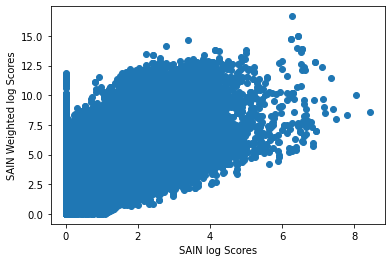

In [47]:
import matplotlib.pyplot as plt
plt.scatter(data['SAIN log score'].values, data['SAIN Weighted log score'].values)
plt.xlabel('SAIN log Scores')
plt.ylabel('SAIN Weighted log Scores')
plt.show()

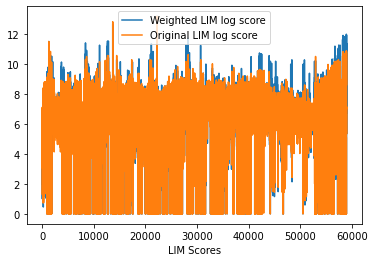

In [36]:
import matplotlib.pyplot as plt
plt.plot(data['LIM Weighted log score'].values, label = "Weighted LIM log score")
plt.plot(data['LIM log score'].values, label = "Original LIM log score")

plt.xlabel('LIM Scores')
plt.legend()
plt.show()

### Calculate correlation between Original SAIN and Modified SAIN scores

In [37]:
import scipy.stats

In [39]:
def compute_corr(x, y):
    per_co = scipy.stats.pearsonr(x, y)[0]
    spe_co = scipy.stats.spearmanr(x, y)[0]
    ken_co = scipy.stats.kendalltau(x, y)[0]
    
    return (per_co, spe_co, ken_co)

In [64]:
corr_sain = compute_corr(data['SAIN score'], data['SAIN Weighted score'])
print ('Correlation between SAIN original and SAIN Weighted Score')
print ('Pearson Correlation:{} \nSpearman Correlation:{} \nKendall-Tau Correlation:{}\n'.format(corr_sain[0], corr_sain[1], corr_sain[2]))

Correlation between SAIN original and SAIN Weighted Score
Pearson Correlation:0.12970974770973692 
Spearman Correlation:0.5670575306818909 
Kendall-Tau Correlation:0.4089028330660082



In [65]:
corr_sain_log = compute_corr(data['SAIN log score'], data['SAIN Weighted log score'])
print ('Correlation between SAIN log score and SAIN Weighted log Score')
print ('Pearson Correlation:{} \nSpearman Correlation:{} \nKendall-Tau Correlation:{}\n'.format(corr_sain_log[0], corr_sain_log[1], corr_sain_log[2]))

Correlation between SAIN log score and SAIN Weighted log Score
Pearson Correlation:0.5622720636263814 
Spearman Correlation:0.5661590340639376 
Kendall-Tau Correlation:0.4090207980779579



In [66]:
corr_lim = compute_corr(data['LIM score'], data['LIM Weighted score'])
print ('Correlation between LIM score and LIM Weighted Score')
print ('Pearson Correlation:{} \nSpearman Correlation:{} \nKendall-Tau Correlation:{}\n'.format(corr_lim[0], corr_lim[1], corr_lim[2]))

Correlation between LIM score and LIM Weighted Score
Pearson Correlation:0.8365493549642189 
Spearman Correlation:0.9167327194448229 
Kendall-Tau Correlation:0.7986701595666582



In [67]:
corr_lim_log = compute_corr(data['LIM log score'], data['LIM Weighted log score'])
print ('Correlation between LIM log score and LIM Weighted log Score')
print ('Pearson Correlation:{} \nSpearman Correlation:{} \nKendall-Tau Correlation:{}\n'.format(corr_lim_log[0], corr_lim_log[1], corr_lim_log[2]))

Correlation between LIM log score and LIM Weighted log Score
Pearson Correlation:0.9696730083206815 
Spearman Correlation:0.916727721121287 
Kendall-Tau Correlation:0.7985882242636634

